In [1]:
import os
import json

In [51]:
import json # 체크포인트를 로드하여 작업시 필요한 수치들 저장
path = 'C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final Project/Data/IC_Data/멀티모달 데이터/멀티모달/멀티모달_분야/'
path_part = path + os.listdir(path)[0] + '/'
path_part_dt01 = path_part + os.listdir(path_part)[0] + '/'
os.listdir(path_part_dt01)

['KETI_MULTIMODAL_0000000012',
 'KETI_MULTIMODAL_0000000012_interpolation.json',
 'KETI_MULTIMODAL_0000000012_jiyu.json',
 'KETI_MULTIMODAL_0000000012_jiyu_interpolation.json',
 'KETI_MULTIMODAL_0000000012_roykim1234.json',
 'KETI_MULTIMODAL_0000000012_roykim1234_interpolation.json']

In [ ]:
with open(path_part_dt01 + os.listdir(path_part_dt01)[1], 'r', encoding = 'utf8') as f:
    json_data = json.load(f)
json_data['shot_infos'][0]

In [61]:
# 경로추출을 통한 영상 및 중복사진 제거
from tqdm.notebook import tqdm

video_list = []
photo_list = []
path = 'C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final Project/Data/IC_Data/멀티모달 데이터/멀티모달/멀티모달_분야/'
for t in tqdm(range(len(os.listdir(path)))):
    path_part = path + os.listdir(path)[t] + '/'
    for i in range(len(os.listdir(path_part))):
        path_part_dt01 = path_part + os.listdir(path_part)[i] + '/'
        for k in range(len(os.listdir(path_part_dt01))): 
            if 'mp4' in os.listdir(path_part_dt01)[k]:
                video =  path_part_dt01 + os.listdir(path_part_dt01)[k]
                video_list.append(video)
        for folder_name in os.listdir(path_part_dt01):
            if '.' not in folder_name:
                path_part_dt02 = path_part_dt01 + folder_name + '/'
        for folder_name in os.listdir(path_part_dt02):
            if '.' not in folder_name:
                path_part_dt03 = path_part_dt02 + folder_name + '/'
                for photo in os.listdir(path_part_dt03)[1:]:
                    photo_name = path_part_dt03 + photo
                    photo_list.append(photo_name)   
                    
# 필요없는 영상 및 중복사진 삭제
for video in tqdm(video_list):
    os.remove(video)
for photo in tqdm(photo_list):
    os.remove(photo)

  0%|          | 0/11 [00:00<?, ?it/s]

In [77]:
# 이미지 경로 추출
from tqdm.notebook import tqdm
photo_list = []
photo_dir_list = []
photo_folderName_list = []
path = 'C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final Project/Data/IC_Data/멀티모달 데이터/멀티모달/멀티모달_분야/'
for t in tqdm(range(len(os.listdir(path)))):
    path_part = path + os.listdir(path)[t] + '/'
    for i in range(len(os.listdir(path_part))):
        path_part_dt01 = path_part + os.listdir(path_part)[i] + '/'
        for folder_name in os.listdir(path_part_dt01):
            if '.' not in folder_name:
                path_part_dt02 = path_part_dt01 + folder_name + '/'
        for folder_name in os.listdir(path_part_dt02):
            if '.' not in folder_name:
                photo_folderName_list.append(folder_name)
                path_part_dt03 = path_part_dt02 + folder_name + '/'
                for photo in os.listdir(path_part_dt03):
                    photo_dir = path_part_dt03 + photo
                    photo_list.append(photo)
                    photo_dir_list.append(photo_dir)   

  0%|          | 0/11 [00:00<?, ?it/s]

In [102]:
import pandas as pd
df = pd.DataFrame({'사진경로(전체경로)' : photo_dir_list, '사진이름' : photo_list})
df['사진경로(이미지폴더)'] = [0 for _ in range(len(photo_dir_list))]

In [101]:
len(photo_dir_list), len(photo_list), len(photo_folderName_list)

(24191, 24191, 24198)

In [104]:
# for photo_folderName in tqdm(photo_folderName_list):
#     for i in range(len(photo_dir_list)):
#         if photo_folderName in df['사진경로(전체경로)'][i]:
#             df['사진경로(이미지폴더)'][i] = photo_folderName

  0%|          | 0/24198 [00:00<?, ?it/s]

In [118]:
n = 5500
df['사진경로(전체경로)'][n], df['사진경로(이미지폴더)'][n] 
df.to_csv('C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final Project/Data/IC_Data/멀티모달_데이터정리(작성중1).csv', index = False)

In [119]:
df = pd.read_csv('C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final Project/Data/IC_Data/멀티모달_데이터정리(작성중1).csv')
df.head()

,사진경로(전체경로),사진이름,사진경로(이미지폴더)
0,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,KM_0000000009.jpg,KETI_SHOT_0000145747
1,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,KM_0000000041.jpg,KETI_SHOT_0000145748
2,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,KM_0000000092.jpg,KETI_SHOT_0000145749
3,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,KM_0000000172.jpg,KETI_SHOT_0000145750
4,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,KM_0000000213.jpg,KETI_SHOT_0000145751


In [186]:
# 불필요 json파일 제거
from tqdm.notebook import tqdm

json_list = []
path = 'C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final Project/Data/IC_Data/멀티모달 데이터/멀티모달/멀티모달_분야/'
for t in tqdm(range(len(os.listdir(path)))):
    path_part = path + os.listdir(path)[t] + '/'
    for i in range(len(os.listdir(path_part))):
        path_part_dt01 = path_part + os.listdir(path_part)[i] + '/'
        for json_file in os.listdir(path_part_dt01):
            if '.' not in json_file:
                json_file_N = json_file
        for json_file in os.listdir(path_part_dt01):
            if json_file != json_file_N and json_file != json_file_N + '_interpolation.json':
                json_list.append(path_part_dt01 + json_file)

  0%|          | 0/11 [00:00<?, ?it/s]

In [189]:
len(set(json_list)), len(json_list)

(7196, 7196)

In [179]:
path = 'C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final Project/Data/IC_Data/멀티모달 데이터/멀티모달/멀티모달_분야/'
path_part = path + os.listdir(path)[0] + '/'
path_part_dt01 = path_part + os.listdir(path_part)[0] + '/'

with open(path_part_dt01 + os.listdir(path_part_dt01)[1], 'r', encoding = 'utf8') as f:
    json_data = json.load(f)
print(len(json_data['shot_infos'][0]))
print(json_data['shot_infos'][0]['image_folder']) # 이미지 사진이 저장된 폴더 이름
print(len(json_data['shot_infos'][0]['visual_infos'])) 
print(json_data['shot_infos'][0]['visual_infos'][0]['image_id']) # 이미지 파일이름
print(json_data['shot_infos'][0]['visual_infos'][0]['image_descs']) # 캡셔닝 데이터
json_data['shot_infos'][1]['image_folder']
os.listdir(path_part_dt01)

2
KETI_SHOT_0000145756
53
KM_0000000448.jpg
['남자들이 있다', '남자들은 서로 쳐다보고있다', '남자는 검정머리이다', '남자는 흰 셔츠를 입고있다', '남자는 옆을 보고있다']


['KETI_MULTIMODAL_0000000012',
 'KETI_MULTIMODAL_0000000012_interpolation.json',
 'KETI_MULTIMODAL_0000000012_jiyu.json',
 'KETI_MULTIMODAL_0000000012_jiyu_interpolation.json',
 'KETI_MULTIMODAL_0000000012_roykim1234.json',
 'KETI_MULTIMODAL_0000000012_roykim1234_interpolation.json']

In [161]:
df = pd.read_csv('C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final Project/Data/IC_Data/멀티모달_데이터정리(작성중1).csv')
df['캡셔닝_데이터'] = [0 for _ in range(len(df['사진이름']))]
df['사진경로(전체경로)'][0]

'C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final Project/Data/IC_Data/멀티모달 데이터/멀티모달/멀티모달_분야/멀티모달_Part_01/KETI_MULTIMODAL_0000000012/KETI_MULTIMODAL_0000000012/KETI_SHOT_0000145747/KM_0000000009.jpg'

In [212]:
# 사진별 캡셔닝 데이터 추출 및 데이터 프레임에 저장
from tqdm.notebook import tqdm

path = 'C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final Project/Data/IC_Data/멀티모달 데이터/멀티모달/멀티모달_분야/'
for t in tqdm(range(len(os.listdir(path)))):
    path_part = path + os.listdir(path)[t] + '/'
    for i in range(len(os.listdir(path_part))):
        path_part_dt01 = path_part + os.listdir(path_part)[i] + '/'
        for json_file in os.listdir(path_part_dt01):
            if '.' not in json_file:
                json_file_N = json_file
        json_file = path_part_dt01 + json_file_N + '_interpolation.json'
        try:
            with open(json_file, 'r', encoding = 'utf8') as f: 
                json_data = json.load(f)
            for num1 in range(len(json_data['shot_infos'])):
                for num2 in range(len(df['사진경로(전체경로)'])):
                    if json_data['shot_infos'][num1]['image_folder'] == df['사진경로(이미지폴더)'][num2]:
                        for num3 in range(len(json_data['shot_infos'][num1]['visual_infos'])):
                            if json_data['shot_infos'][num1]['visual_infos'][num3]['image_id'] == df['사진이름'][num2]:
                                df['캡셔닝_데이터'][num2] = json_data['shot_infos'][num1]['visual_infos'][num3]['image_descs']
        except:
            print(json_file)
# 프린트 되는 json파일은 오류가 뜬것입니다.....

  0%|          | 0/11 [00:00<?, ?it/s]

C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final Project/Data/IC_Data/멀티모달 데이터/멀티모달/멀티모달_분야/멀티모달_Part_01/KETI_MULTIMODAL_0000000027/KETI_MULTIMODAL_0000000027_interpolation.json


In [252]:
# json에서 추출실패한 181개 값 삭제처리
list1 = [] 
for i in range(len(df[df['캡셔닝_데이터'] == 0]['사진경로(전체경로)'])):
    list1.append(list(df[df['캡셔닝_데이터'] == 0]['사진경로(전체경로)'])[i][90:129])
len(list1), len(list1)

(181, 181)

In [260]:
df_ch = df[df['캡셔닝_데이터'] != 0].copy()
df_ch.reset_index(drop = True, inplace = True)

In [264]:
len(df), len(df_ch), (len(df) - len(df_ch))

(24191, 24010, 181)

['남자가 생각하고 있다', '남자가 안경을 끼고있다', '남자가 푸른색 니트를 입고있다', '남자가 방 안에 있다', '남자 뒤에 침대가 있다']


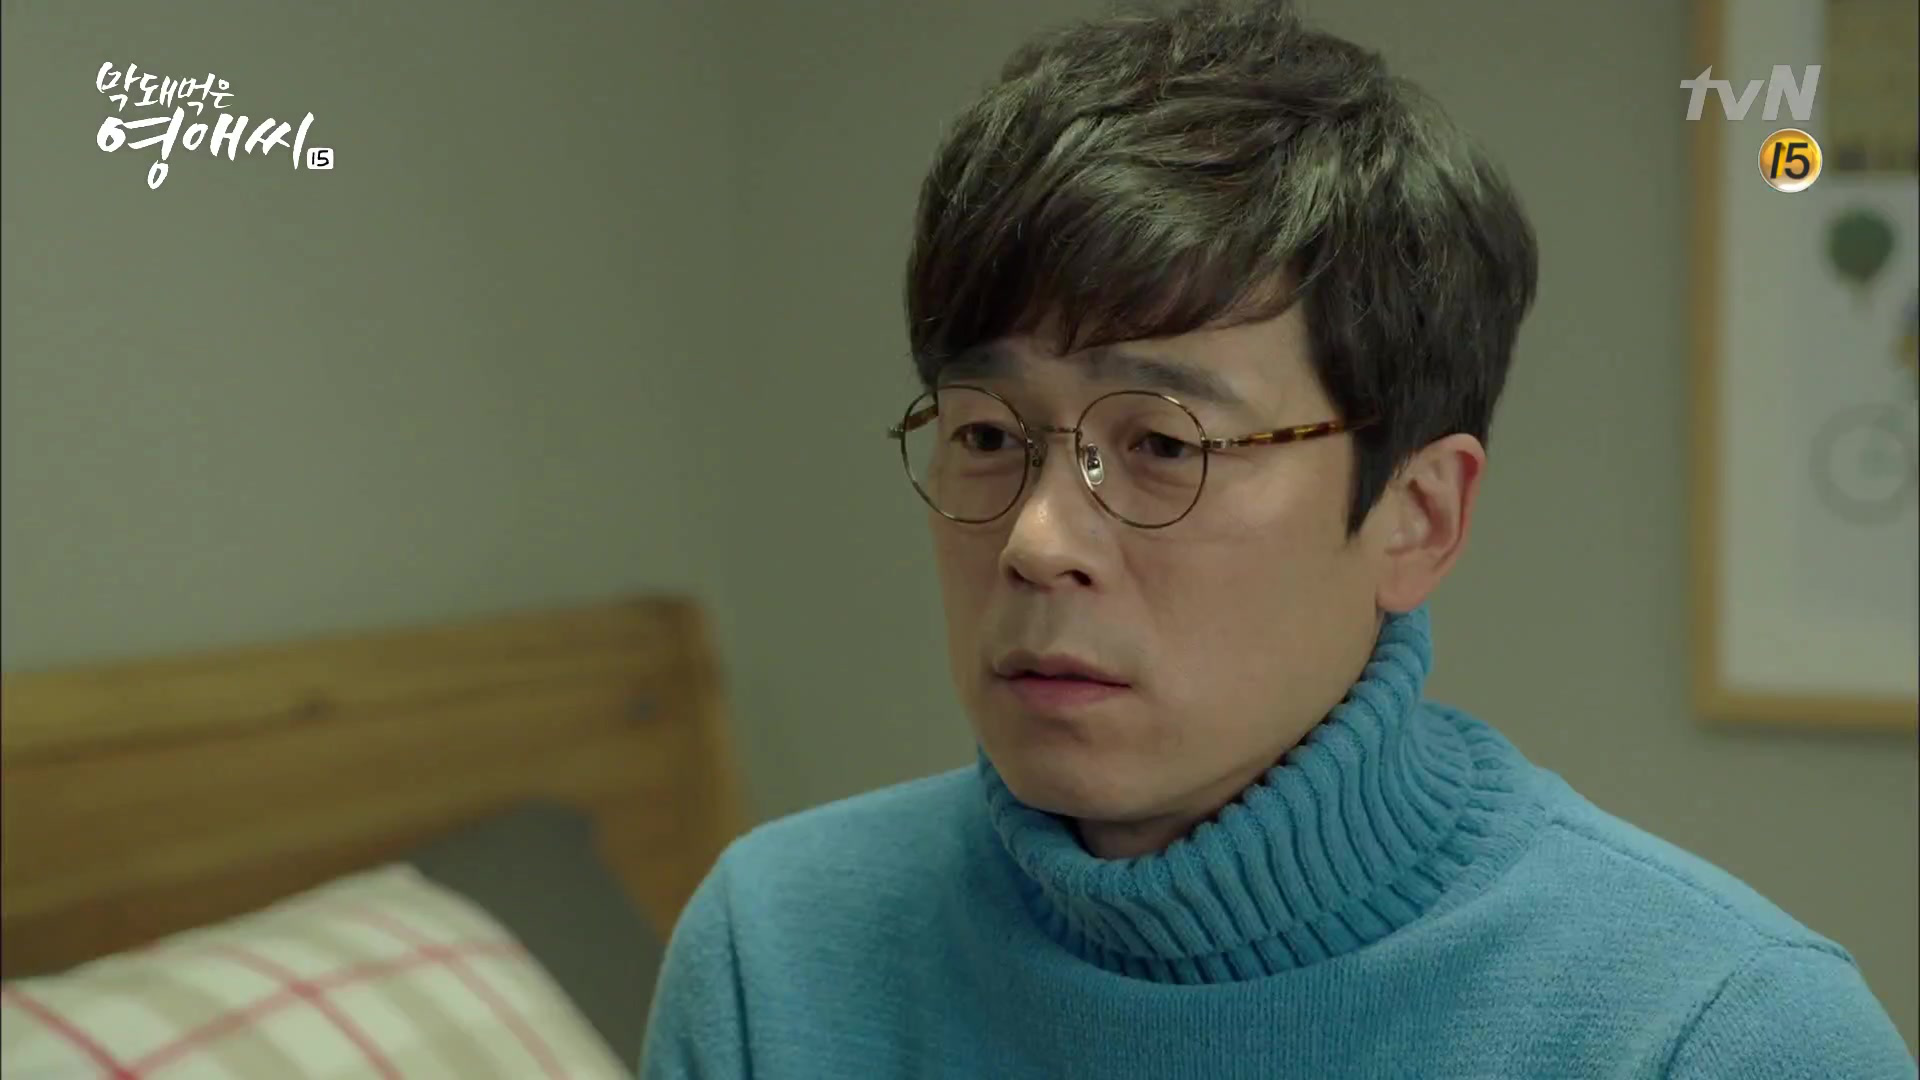

In [276]:
from PIL import Image
n = 5500
print(df_ch['캡셔닝_데이터'][n])
Image.open(df_ch['사진경로(전체경로)'][n])

In [278]:
df_ch.to_csv('C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final Project/Data/IC_Data/멀티모달_데이터정리(작성중2).csv', index = False)
df_ch = pd.read_csv('C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final Project/Data/IC_Data/멀티모달_데이터정리(작성중2).csv')
df_ch.head()

,사진경로(전체경로),사진이름,사진경로(이미지폴더),캡셔닝_데이터
0,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,KM_0000000009.jpg,KETI_SHOT_0000145747,"['남자 두명과 여자 한명이 있다', '모두 앉아있다', '과일이 놓여있다', '남..."
1,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,KM_0000000041.jpg,KETI_SHOT_0000145748,"['남자가 있다', '여자가 두명 있다', '과일이 놓여있다', '술을 마시고있다'..."
2,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,KM_0000000092.jpg,KETI_SHOT_0000145749,"['남자가 두명있다', '맞은편에 여자가 있다', '여자는 머리를 묶었다', '사람..."
3,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,KM_0000000172.jpg,KETI_SHOT_0000145750,"['여자 두명이 있다', '맞은편에 남자가 있다', '과일이 식탁에 놓여있다', '..."
4,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,KM_0000000213.jpg,KETI_SHOT_0000145751,"['남자는 옆을 본다', '남자는 셔츠를 입고있다', '뒤에 불빛이 비친다', '남..."


In [280]:
check_point = 'Part_01' # Part_01 ~ 11까지 구분(기존 파일 폴더명)
df_ch['사진경로(전체경로)'][0]

'C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final Project/Data/IC_Data/멀티모달 데이터/멀티모달/멀티모달_분야/멀티모달_Part_01/KETI_MULTIMODAL_0000000012/KETI_MULTIMODAL_0000000012/KETI_SHOT_0000145747/KM_0000000009.jpg'

In [282]:
import shutil
image_path_bf = df_ch['사진경로(전체경로)'][0]
image_path_af = 'C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final Project/Data/IC_Data/멀티모달 데이터/멀티모달(자료통합)'
shutil.copy2(image_path_bf,image_path_af)

'C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final Project/Data/IC_Data/멀티모달 데이터/멀티모달(자료통합)\\KM_0000000009.jpg'

In [287]:
os.rename(image_path_af + '/' + df_ch['사진이름'][0], image_path_af + '/' + df_ch['사진경로(이미지폴더)'][0] + '_' + df_ch['사진이름'][0])

In [291]:
import shutil
image_path_af = 'C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final Project/Data/IC_Data/멀티모달 데이터/멀티모달(자료통합)'
for i in tqdm(range(len(df_ch['사진경로(전체경로)']))):
    image_path_bf = df_ch['사진경로(전체경로)'][i]
    shutil.copy2(image_path_bf, image_path_af)
    os.rename(image_path_af + '/' + df_ch['사진이름'][i], image_path_af + '/' + df_ch['사진경로(이미지폴더)'][i] + '_' + df_ch['사진이름'][i])

  0%|          | 0/24010 [00:00<?, ?it/s]

In [399]:
df_ch1['사진이름(전처리완료)'] = df_ch1['사진경로(이미지폴더)'] + '_' + df_ch1['사진이름']
df_ch1['사진경로(전처리완료)'] = image_path_af + '/' + df_ch1['사진이름(전처리완료)']
df_ch2 = df_ch1[['사진경로(전처리완료)', '사진이름(전처리완료)', '캡셔닝_데이터']].copy()
df_ch2.to_csv('C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final Project/Data/IC_Data/멀티모달_데이터정리(작성중3).csv', index = False)
df_ch2 = pd.read_csv('C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final Project/Data/IC_Data/멀티모달_데이터정리(작성중3).csv')
df_ch2

,사진경로(전처리완료),사진이름(전처리완료),캡셔닝_데이터
0,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,KETI_SHOT_0000145747_KM_0000000009.jpg,"['남자 두명과 여자 한명이 있다', '모두 앉아있다', '과일이 놓여있다', '남..."
1,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,KETI_SHOT_0000145748_KM_0000000041.jpg,"['남자가 있다', '여자가 두명 있다', '과일이 놓여있다', '술을 마시고있다'..."
2,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,KETI_SHOT_0000145749_KM_0000000092.jpg,"['남자가 두명있다', '맞은편에 여자가 있다', '여자는 머리를 묶었다', '사람..."
3,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,KETI_SHOT_0000145750_KM_0000000172.jpg,"['여자 두명이 있다', '맞은편에 남자가 있다', '과일이 식탁에 놓여있다', '..."
4,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,KETI_SHOT_0000145751_KM_0000000213.jpg,"['남자는 옆을 본다', '남자는 셔츠를 입고있다', '뒤에 불빛이 비친다', '남..."
...,...,...,...
24005,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,KETI_SHOT_0000148195_KM_0000003857.jpg,"['여자의 입술이 빨갛다', '여자는 외투를 입었다', '여자는 머리가 길다', '..."
24006,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,KETI_SHOT_0000148196_KM_0000003933.jpg,"['남자는 말한다', '남자가 손을 가슴에 두고 있다', '남자는 외투를 입었다',..."
24007,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,KETI_SHOT_0000148197_KM_0000004092.jpg,"['남자가 아래쪽을 보고 있다', '남자는 생각한다', '남자는 외투를 입었다', ..."
24008,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,KETI_SHOT_0000148198_KM_0000004193.jpg,"['여자의 입술이 빨갛다', '여자는 입을 다물고 있다', '여자는 외투를 입었다'..."


여자가 있다, 여자가 머리를 뒤로 묶었다, 여자가 검은색 상의를 입었다, 여자의 입이 살짝 벌려저있다, 여자 옆에 창문이 보인다


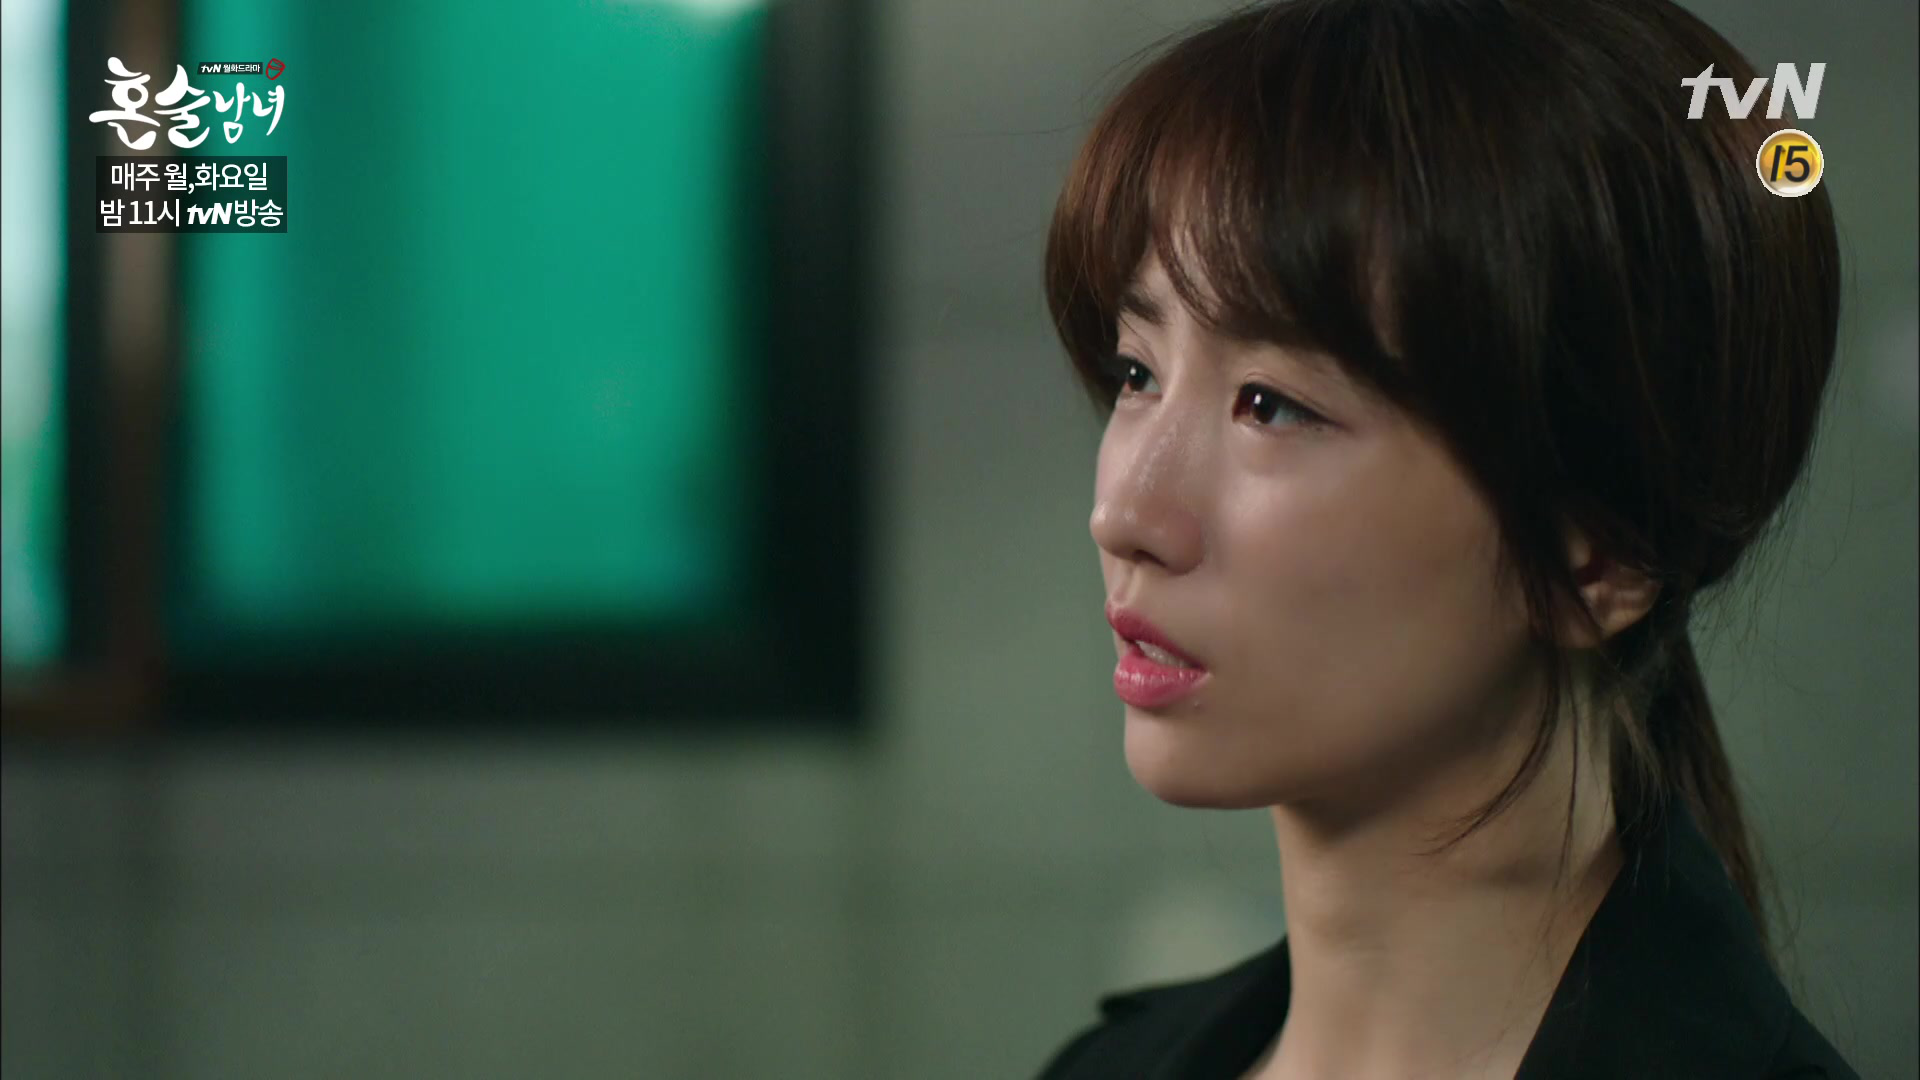

In [340]:
from PIL import Image
n = 3402
print(df_ch2['캡셔닝_데이터'][n])
Image.open(df_ch2['사진경로(전처리완료)'][n])

In [467]:
df_ch2 = pd.read_csv('C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final Project/Data/IC_Data/멀티모달_데이터정리(작성중3).csv')

caption_list = []
caption_original_list = []
image_name_list = []
import re
# df_ch2['캡셔닝_데이터'] = df_ch2['캡셔닝_데이터'].apply(lambda x: re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣, ]', '', x))

for i in range(len(df_ch2['캡셔닝_데이터'])):
    captions = df_ch2['캡셔닝_데이터'][i].split(', ')
    for caption in captions:
        image_name_list.append(df_ch2['사진이름(전처리완료)'][i])
        caption_original_list.append(df_ch2['캡셔닝_데이터'][i])
        caption_list.append(caption)

In [468]:
captions = df_ch2['캡셔닝_데이터'][659].split(', ')
for caption in captions:
    print(df_ch2['사진이름(전처리완료)'][659])
    print(caption)
print(df_ch2['캡셔닝_데이터'][659])

KETI_SHOT_0000144711_KM_0000003797.jpg
[''
KETI_SHOT_0000144711_KM_0000003797.jpg
''
KETI_SHOT_0000144711_KM_0000003797.jpg
''
KETI_SHOT_0000144711_KM_0000003797.jpg
''
KETI_SHOT_0000144711_KM_0000003797.jpg
'']
['', '', '', '', '']


In [469]:
df_ch2['캡셔닝_데이터'][22970]	

"['남자가 춤추고 있다.', '남자가 상의, 하의를 안입었다.', '남자가 무릎을 굽히고 있다.', '소파가 검은색이다.', '바닥이 갈색이다.']"

In [471]:
n = 114927
print(image_name_list[n])
print(caption_original_list[n])
print(caption_list[n])
df_ch2[df_ch2['사진이름(전처리완료)'] == image_name_list[n]]

KETI_SHOT_0000146039_KM_0000002979.jpg
['남자가 춤추고 있다.', '남자가 상의, 하의를 안입었다.', '남자가 무릎을 굽히고 있다.', '소파가 검은색이다.', '바닥이 갈색이다.']
하의를 안입었다.'


,사진경로(전처리완료),사진이름(전처리완료),캡셔닝_데이터
22970,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,KETI_SHOT_0000146039_KM_0000002979.jpg,"['남자가 춤추고 있다.', '남자가 상의, 하의를 안입었다.', '남자가 무릎을 ..."


In [472]:
for index, caption in enumerate(caption_list):
    if '다' not in caption:
        print(index, caption)

558 '여자가 보라색 옷을 입고있따'
667 '여자가 보라색 셔츠를 입고있따'
780 ['남자와 여자는 핑크색 옷을 입었'
990 [''
991 ''
992 ''
993 ''
994 '']
3295 [''
3296 ''
3297 ''
3298 ''
3299 '']
3744 '여자가 깃이 넓은 셔츠를 입고 있따']
3754 '여자가 깃이 넓은 셔츠를 입고 있따']
3764 '여자가 깃이 넓은 셔츠를 입고 있따']
3774 '여자가 깃이 넓은 셔츠를 입고 있따']
3799 '여자가 깃이 넓은 셔츠를 입고 있따']
4006 '여자가 머리를'
4170 [''
4171 ''
4172 ''
4173 ''
4174 '']
4193 '여자2가 웃고 있따'
4315 [''
4316 ''
4317 ''
4318 ''
4319 '']
4380 [''
4381 ''
4382 ''
4383 ''
4384 '']
7909 '여자가 무언가를 말하는 것 같가']
8483 '남자 한 명이 넥타이를 메고 있따'
9259 '']
9339 '남자 머리는 노란색이 섞여있따']
10637 '남자 한 명이 넥타이를 하고 있따'
10772 '여자가 레이스 원피스를 입고 있디.'
11296 '사람들이 길 위에 있따'
13569 '남자는 눈을 아래로 깔고 있ㄷ']
13871 '여자 앞쪽에 촛불이 있따'
14975 ['사람이 휴대전화를 들고 있따'
15970 [''
15971 ''
15972 ''
15973 ''
15974 '']
16013 '머리를 '
16461 '남자는 안대를 쓰고 있따'
17125 ['여자는 남색 옷을 입고
17138 '서랍 위에 화장품들이 정리되어 있고
17569 '두 명의 여자가 가게에 있따'
19303 '남자1
19304 2
19458 '남자가 바닥을 바라보고 이싿.']
19476 '여자가 어쩔줄 몰라하고 있따.'
19494 ['남자가 고개를 돌렸따'
20105 '남자가 빨간옷을 입고있따'
20364 ['사람이 갈색 단화를 신고있따'
21903 '소금은 하얀색
23985 [''


In [366]:
# image_name_list = []
# captioning_list = []
# for i in range(len(df_ch2)):    
#     for k in range(len(df_ch2['캡셔닝_데이터'][i].split(', '))):
#         image_name_list.append(df_ch2['사진이름(전처리완료)'][i])
#         captioning_list.append(df_ch2['캡셔닝_데이터'][i].split(', ')[k])

0        ['남자 두명과 여자 한명이 있다', '모두 앉아있다', '과일이 놓여있다', '남...
1        ['남자가 있다', '여자가 두명 있다', '과일이 놓여있다', '술을 마시고있다'...
2        ['남자가 두명있다', '맞은편에 여자가 있다', '여자는 머리를 묶었다', '사람...
3        ['여자 두명이 있다', '맞은편에 남자가 있다', '과일이 식탁에 놓여있다', '...
4        ['남자는 옆을 본다', '남자는 셔츠를 입고있다', '뒤에 불빛이 비친다', '남...
                               ...                        
24005    ['여자의 입술이 빨갛다', '여자는 외투를 입었다', '여자는 머리가 길다', '...
24006    ['남자는 말한다', '남자가 손을 가슴에 두고 있다', '남자는 외투를 입었다',...
24007    ['남자가 아래쪽을 보고 있다', '남자는 생각한다', '남자는 외투를 입었다', ...
24008    ['여자의 입술이 빨갛다', '여자는 입을 다물고 있다', '여자는 외투를 입었다'...
24009    ['여자가 앞쪽을 보고 있다', '여자는 입을 다물고 있다', '여자는 외투를 입었...
Name: 캡셔닝_데이터, Length: 24010, dtype: object